In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
from PIL import Image

2025-10-26 10:35:17.010842: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-26 10:35:17.011036: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-26 10:35:17.040135: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-26 10:35:17.755172: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

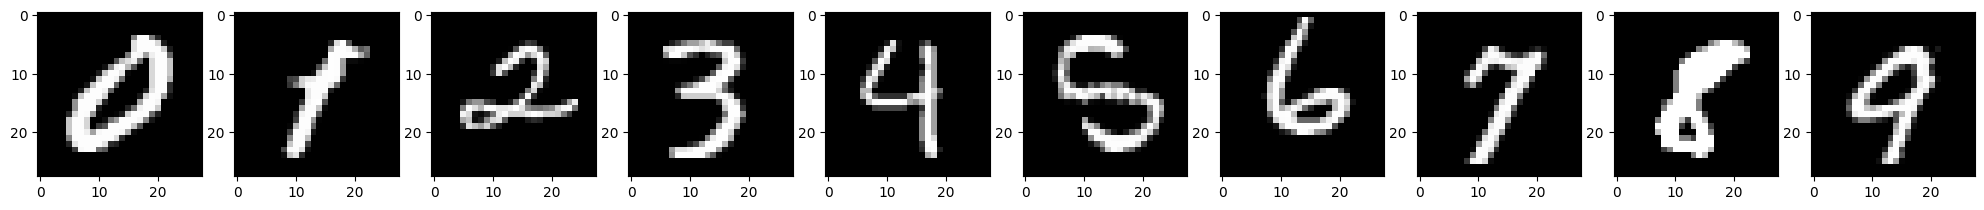

In [3]:
fig, axs = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10):
    label_indexes = np.where(y_train==i)[0]
    index = random.choice(label_indexes)
    img = x_train[index]
    axs[i].imshow(Image.fromarray(img), cmap='gray')

In [4]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [6]:
batch_size = 128

model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/kirill/Документы/Project/Cifar-10/venv/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E0000 00:00:1761453318.659905  182738 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1761453318.663534  182738 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9491 - loss: 0.1679 - val_accuracy: 0.9799 - val_loss: 0.0611
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9834 - loss: 0.0531 - val_accuracy: 0.9878 - val_loss: 0.0398
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9888 - loss: 0.0361 - val_accuracy: 0.9901 - val_loss: 0.0316
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9912 - loss: 0.0265 - val_accuracy: 0.9898 - val_loss: 0.0348
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9927 - loss: 0.0221 - val_accuracy: 0.9912 - val_loss: 0.0266
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9912 - val_loss: 0.0310
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9943 - loss: 0.0177 - val_accuracy: 0.9911 - val_loss: 0.0293
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9954 - loss: 0.0136 - val_accu

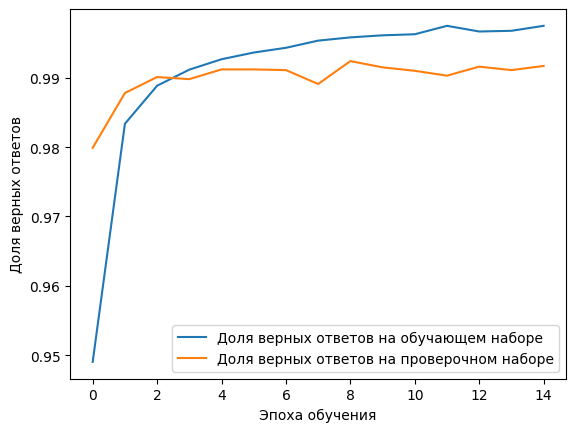

In [7]:
history = model.fit(x_train,
                   y_train,
                   batch_size=batch_size,
                   epochs=15,
                   validation_data=(x_test, y_test),
                   verbose=1)
plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 28, 28, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,854,088 (18.52 MB)

 Trainable params: 1,618,028 (6.17 MB)

 Non-trainable params: 2 (8.00 B)

 Optimizer params: 3,236,058 (12.34 MB)

In [9]:
n = 2020
prediction = model.predict(x_test)
print(np.argmax(prediction[n]))
print(np.argmax(y_test[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
3
3


In [20]:
def change_contrast(img, factor):
    def contrast(pixel):
        return 128 + factor * (pixel - 128)
    return img.point(contrast)

xTestReal = []
yTestReal = []

for i in range(10):
    img_path = f'./data/digits/{i}.png'

    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    img1 = change_contrast(img, factor=0.5)
    xTestReal.append(255 - np.asarray(img1))
    yTestReal.append(i)

xTestReal = np.array(xTestReal)
yTestReal = np.array(yTestReal)

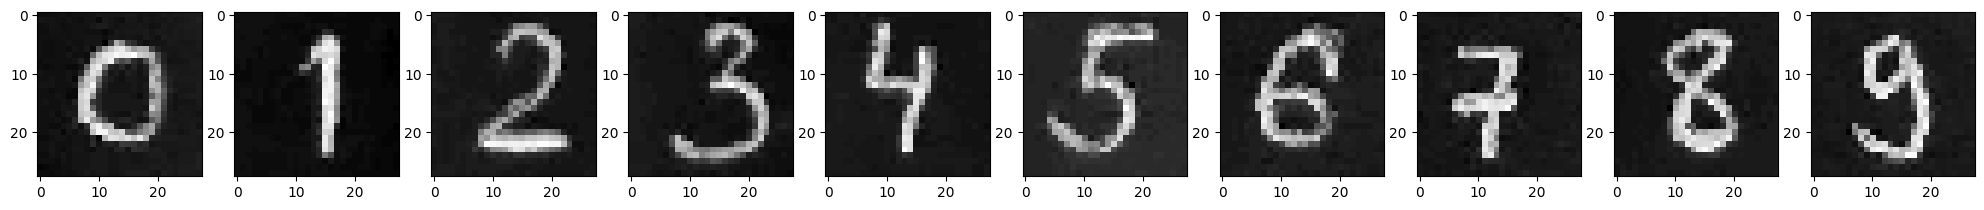

In [21]:
fig, axs = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10):
    axs[i].imshow(Image.fromarray(xTestReal[i]), cmap='gray')
plt.show()

In [22]:

xTestReal = xTestReal.reshape(xTestReal.shape[0], 28, 28, 1)

In [23]:
xTestReal.shape

(10, 28, 28, 1)

In [34]:
prediction = model.predict(xTestReal)
for i in range(10):
    print(f'Распозанный образ: {np.argmax(prediction[i])} Верный ответ: {yTestReal[i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Распозанный образ: 0 Верный ответ: 0
Распозанный образ: 3 Верный ответ: 1
Распозанный образ: 3 Верный ответ: 2
Распозанный образ: 3 Верный ответ: 3
Распозанный образ: 3 Верный ответ: 4
Распозанный образ: 3 Верный ответ: 5
Распозанный образ: 3 Верный ответ: 6
Распозанный образ: 8 Верный ответ: 7
Распозанный образ: 3 Верный ответ: 8
Распозанный образ: 3 Верный ответ: 9


## Cifar 10

In [36]:
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


In [37]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

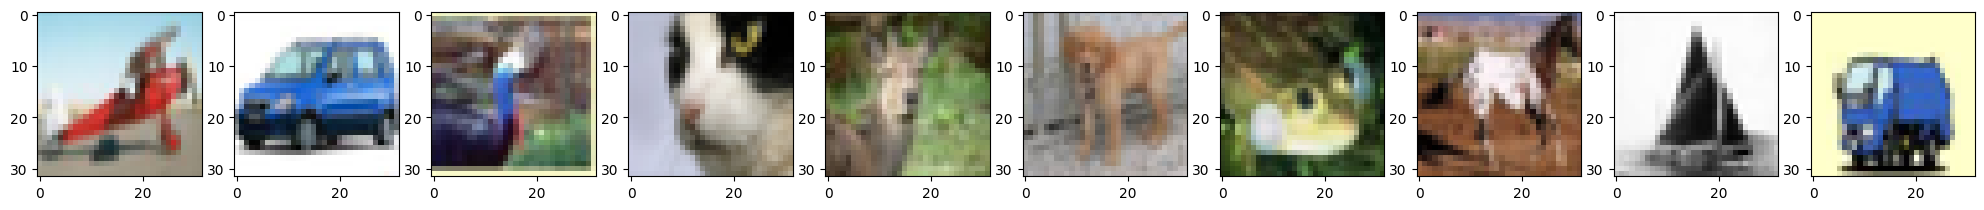

In [40]:
fig, axs = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10):
    label_indexes = np.where(y_train10==i)[0]
    index = random.choice(label_indexes)
    img = x_train10[index]
    axs[i].imshow(Image.fromarray(img))
plt.show()

In [41]:
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [45]:
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [43]:
batch_size = 128 

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/kirill/Документы/Project/Cifar-10/venv/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.6117 - loss: 1.0812 - val_accuracy: 0.6656 - val_loss: 0.9533
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.6833 - loss: 0.8925 - val_accuracy: 0.7202 - val_loss: 0.7964
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.7199 - loss: 0.7914 - val_accuracy: 0.7392 - val_loss: 0.7565
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.7455 - loss: 0.7253 - val_accuracy: 0.7535 - val_loss: 0.7335
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.7637 - loss: 0.6702 - val_accuracy: 0.7743 - val_loss: 0.6603
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.7828 - loss: 0.6201 - val_accuracy: 0.8007 - val_loss: 0.5832
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.7946 - loss: 0.5825 - val_accuracy: 0.7826 - val_loss: 0.6385
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.8037 - loss: 0.5593 - 

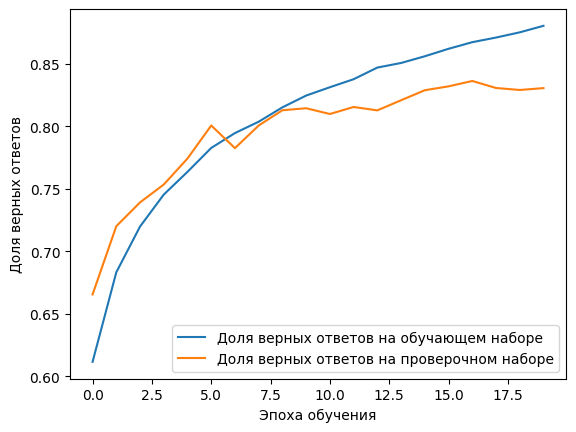

In [46]:
history = model.fit(x_train10, 
                   y_train10,
                   batch_size=batch_size,
                   epochs=20,
                   validation_data=(x_test10, y_test10),
                   verbose=1)
plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,024,472 (15.35 MB)

 Trainable params: 1,341,424 (5.12 MB)

 Non-trainable params: 198 (792.00 B)

 Optimizer params: 2,682,850 (10.23 MB)

In [48]:
prediction = model.predict(x_test10)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


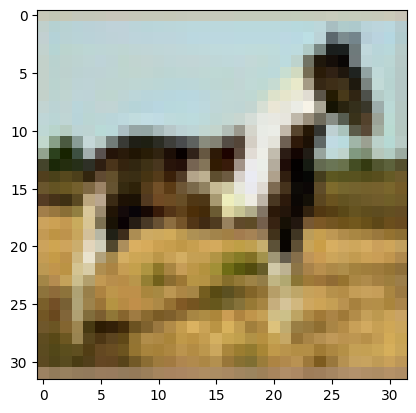

Вывод сети: [1.8619971e-06 3.3816139e-10 4.3774628e-07 1.3390783e-06 1.1830517e-06
 1.0884210e-03 1.1012463e-11 9.9890673e-01 6.6031713e-10 6.6986992e-08]
Расознанный образ: 7
Верный ответ: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Распозанный образ на картинке: лошадь


In [51]:
n = 2028

plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

print(f'Вывод сети: {prediction[n]}')
print(f'Расознанный образ: {np.argmax(prediction[n])}')
print(f'Верный ответ: {y_test10[n]}')
print(f'Распозанный образ на картинке: {classes[np.argmax(prediction[n])]}')